Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 1s 43ms/step - loss: 19416.1895 - val_loss: 50901.9219
Epoch 2/30
4/4 [==============================] - 0s 10ms/step - loss: 13541.5830 - val_loss: 32701.4062
Epoch 3/30
4/4 [==============================] - 0s 12ms/step - loss: 8810.1367 - val_loss: 19063.5234
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 5153.7739 - val_loss: 9688.4443
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 2732.2043 - val_loss: 3874.9954
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss:

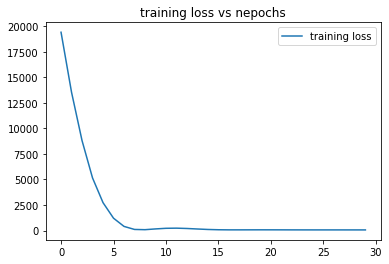

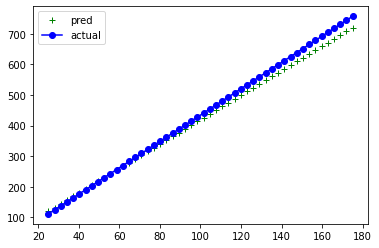

In [ ]:
# (C) 2021, முத்து அண்ணாமலை <ezhillang@gmail.com>
# இந்த நிரல் பொதுவெளி உரிமத்தில் வைக்கப்படுகிறது.
# இந்த நிரல் வழி ஏற்படும் எந்த விளைவிற்கும் ஆசிரியை
# பொருப்பு ஏற்றுக்கொள்ளமாட்டார்.
# 
# ஒரு நேர் கோட்டு 'linear' தரவை ஆழக்கற்றல்மூலம் எப்படி கண்டறிவது?
# உதாரணத்திற்கு நமது தரவில் X என்ற மாரி [0,100] என்ற இடைவெளியில்
# கொடுக்கப்பட்டிருக்கு (இது ஒரு நபரின் வயது என்று வைத்துக்கொள்ளலாம்)
# நபரின் எடை என்பது Y என்ற மாரியில் X என்பதன் சார்பாக விளைகிறது.
# ஆகையால் இந்த சார்புதன்மையை நாம் ஒரு செயற்கை வழி கற்றலின் மூலம்
# எப்படி கற்றுக்கொள்ளலாம் ?

# முதலில் நமது தரவை உருவாக்கலாம்
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Input
from keras.optimizers import adam_v2
from keras.models import Sequential

def எடை_கணக்கிடு( x_மதிப்பு ):
    """ ஒரு நபரின் வயதில் இருந்து எடை என்பதை கணக்கிட """
    y_மதிப்பு = x_மதிப்பு*4 + 20
    return y_மதிப்பு

X_பயில் = np.linspace(0,100,512)
Y_பயில் = எடை_கணக்கிடு(X_பயில்)

X_பரிசோதி = np.linspace(25,175,50)
Y_பரிசோதி = எடை_கணக்கிடு(X_பரிசோதி)

# நேர்கோட்டு சார்பு தன்மையை விளக்கம் செய்ய ஒரு
# செயற்கை பின்னலை வரையரை செய்யலாம்
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=1,activation='relu'))

# நாம் உருவாக்கிய மாதிரி எப்படி இருக்கிறது? இரண்டு மரிகள் கொண்டதையே இங்கு காணலாம்
model.summary()

model.compile(optimizer=adam_v2.Adam(learning_rate=0.125),loss='mse')

# இதை பயில்விக்கலாம் வாங்க!
nepochs=30
history = model.fit(X_பயில்,Y_பயில்,epochs=nepochs,batch_size=128,validation_split=0.2)
print(history.history)
loss = history.history['loss']

# இரண்டு மாதிரிகளின் மதிப்பு எண்ண ?
print(model.weights)

# சரி - ஆழக்கற்றல் பின்னல்களின் ஒரு வெளிப்பாடானது
# பயில்விக்கும் சமயம் ஒவ்வொறு கணமும் உள்ள பயிற்சி
# மதிப்பு குறைவு (loss) குறைந்த படியே செல்லவேண்டும்.
# இதனை வரைபடமாக காணலாம்:
plt.plot(np.arange(nepochs),loss)
plt.title('training loss vs nepochs')
plt.legend(['training loss'])
plt.show()

# அடுத்த பயில்விக்காத தரவின்மீது எமது செயற்கைபின்னல்
# எப்படி செயல்படுகிறது? இதையும் இங்கு காணலாம்
Y_யுகித்த = model.predict(np.array(X_பரிசோதி))
plt.plot(X_பரிசோதி,Y_பரிசோதி,'+g',X_பரிசோதி,Y_யுகித்த,'-ob')
plt.legend(['pred','actual'])
plt.show()
